# Look at data

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#move to correct directory
os.chdir('/Users/isabellasodi/Documents/UCL/PhD/CRUK_datathon_2025')

In [3]:
# load data
#tcr_data = pd.read_csv('input/tcrictionary_tabular.csv' )
tcr_data = pd.read_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/tcrictionary_tabular.csv' )


## Check lengths of CDR3A/B/epitope

In [12]:
tcr_data['CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
tcr_data['CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
tcr_data['epitope_length'] = tcr_data['epitope'].str.len().astype('Int64')

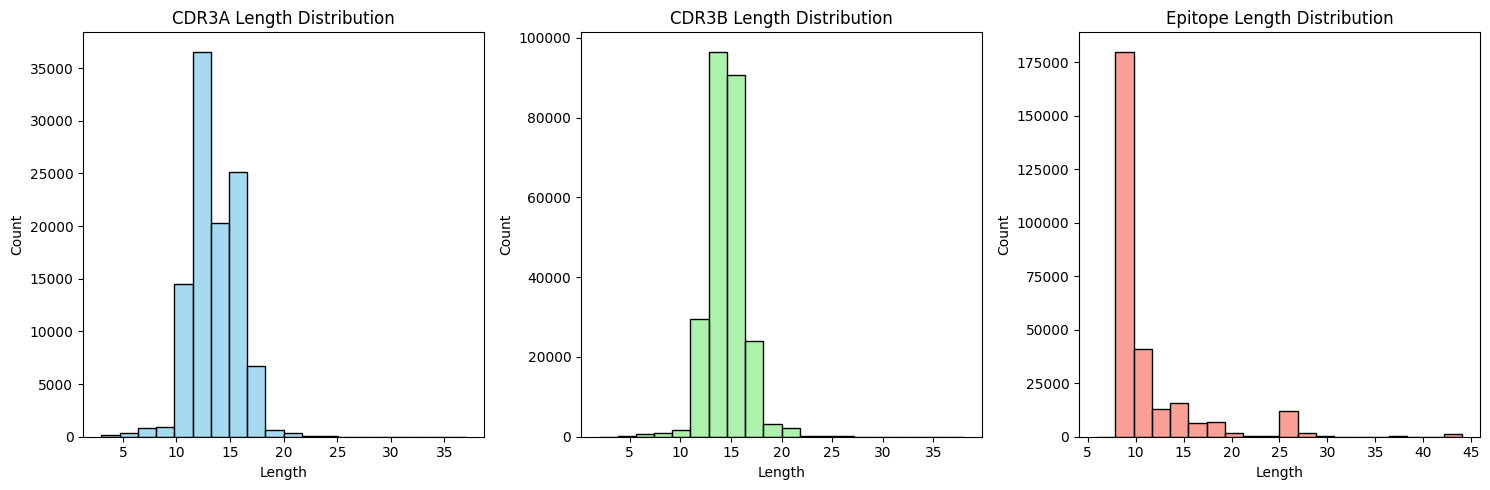

In [13]:
# frequency plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue')
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Count')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen')
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon')
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

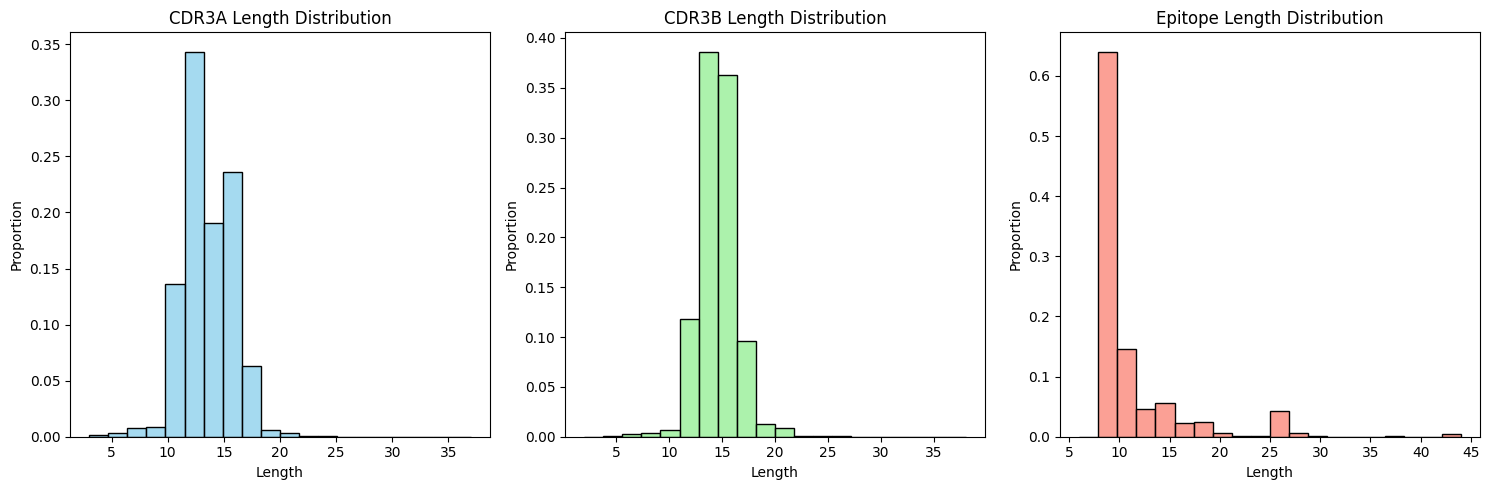

In [14]:
# propotion plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with proportions
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon', stat="proportion")
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Check unique values

In [15]:
print( 'CDR3A',tcr_data['CDR3A'].nunique())
print( 'CDR3B',tcr_data['CDR3B'].nunique())
print( 'epitope',tcr_data['epitope'].nunique())

CDR3A 54029
CDR3B 169929
epitope 3134


CDR3A - unique sequences: 54029
Total sequences: 290880 Unique sequences: 54029

CDR3B - unique sequences: 169929
Total sequences: 290880 Unique sequences: 169929

Epitopes - unique sequences: 3134
Total sequences: 290880 Unique sequences: 3134


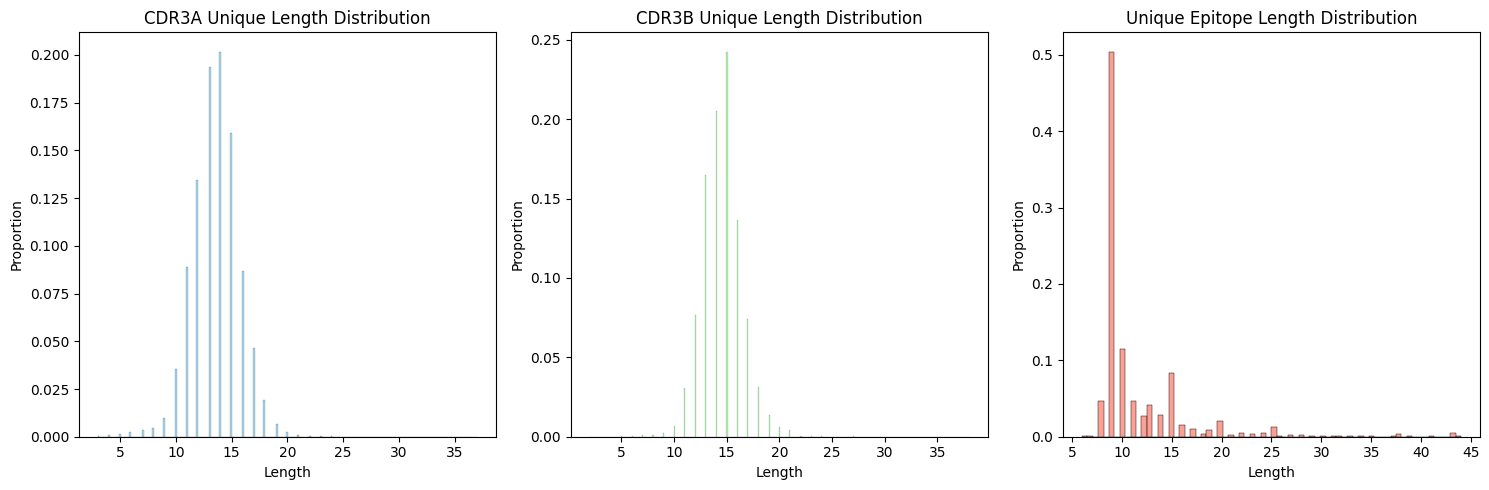

In [20]:
# Get unique sequences and their lengths
unique_cdr3a = tcr_data[['CDR3A', 'CDR3A_length']].dropna().drop_duplicates()
unique_cdr3b = tcr_data[['CDR3B', 'CDR3B_length']].dropna().drop_duplicates()
unique_epitopes = tcr_data[['epitope', 'epitope_length']].dropna().drop_duplicates()

# Print statistics
print("CDR3A - unique sequences:", tcr_data['CDR3A'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3a))

print("\nCDR3B - unique sequences:", tcr_data['CDR3B'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3b))

print("\nEpitopes - unique sequences:", tcr_data['epitope'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_epitopes))

# Create plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for unique sequences
sns.histplot(data=unique_cdr3a, x='CDR3A_length', ax=ax1, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Unique Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=unique_cdr3b, x='CDR3B_length', ax=ax2, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Unique Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=unique_epitopes, x='epitope_length', ax=ax3, color='salmon', stat="proportion")
ax3.set_title('Unique Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

plt.tight_layout()
plt.show()